## **Gradient Descent Implemetation**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [20]:
# gradient descent implemetation 

class gradient_descent():
    def __init__(self, num_iteration, learning_rate):
        self.numIteration = num_iteration # setting number of iteration
        self.learningRate = learning_rate # setting learning rate
        
    def compute_error(self, y, x, theta):
        error = np.sum((y - np.dot(theta, x.transpose()))**2)/(2*len(y)) # Cost function
        return(error)
    
    def add_bias_feature(self, x):
        adding = np.ones(x.shape[0])
        new_x = np.column_stack(tup = (adding, x)) 
        return(new_x)
        
    def calculate_gradient(self, y, x, rand_seed): # hypothesis => y = b + wx
        
        x = self.add_bias_feature(x)
        xTrans = x.transpose()
        
        np.random.seed(seed = rand_seed)
        theta = np.random.normal(loc = 0, scale = 1, size = x.shape[1]) # initialize theta
        theta_history = np.zeros(shape = (self.numIteration, x.shape[1]))
        error_history = np.zeros(shape = self.numIteration)
        
        for num in range(self.numIteration):
            
            gradient = np.dot(xTrans, (y - np.dot(theta, xTrans)))/(-len(y)) 
            
            theta = (theta - self.learningRate * gradient.flatten()) # update parameter
            
            theta_history[num] = theta
            error_history[num] = self.compute_error(y, x, theta)
            # Calculate error after updating the parameters of b and w.
            
        return(theta_history, error_history)

In [25]:
#df = pd.read_csv(filepath_or_buffer = "C:\\Users\\Bing\\Desktop\\GradientDescentExample-master\\data.csv", header = None)
#df = df.rename(columns = {0 : "X", 1 : "Y"})

df = np.genfromtxt(fname = "data.csv", delimiter = ',')
y, x = df[:, 0], df[:, 1]

num_iter = 1000
learning_rate = 10**(-5)

gd = gradient_descent(num_iteration = num_iter, learning_rate = learning_rate)
parameter, err = gd.calculate_gradient(y, x, rand_seed = 123)

In [26]:
bias = parameter[:, 0]
slope = parameter[:, 1]

<IPython.core.display.Javascript object>


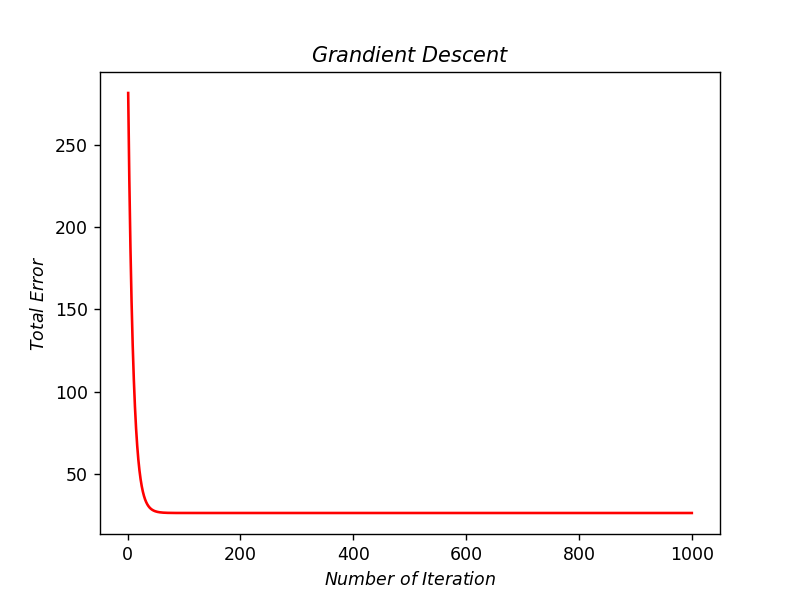

In [27]:
#%matplotlib inline

experiment_times = np.arange(1, num_iter + 1)

#plt.style.use('ggplot')
plt.figure()
plt.plot(experiment_times, err, color = 'r')
plt.title(s = r"$Grandient\ Descent$")
plt.xlabel(s = r'$Number\ of\ Iteration$')
plt.ylabel(s = r'$Total\ Error$')
plt.show()

<IPython.core.display.Javascript object>


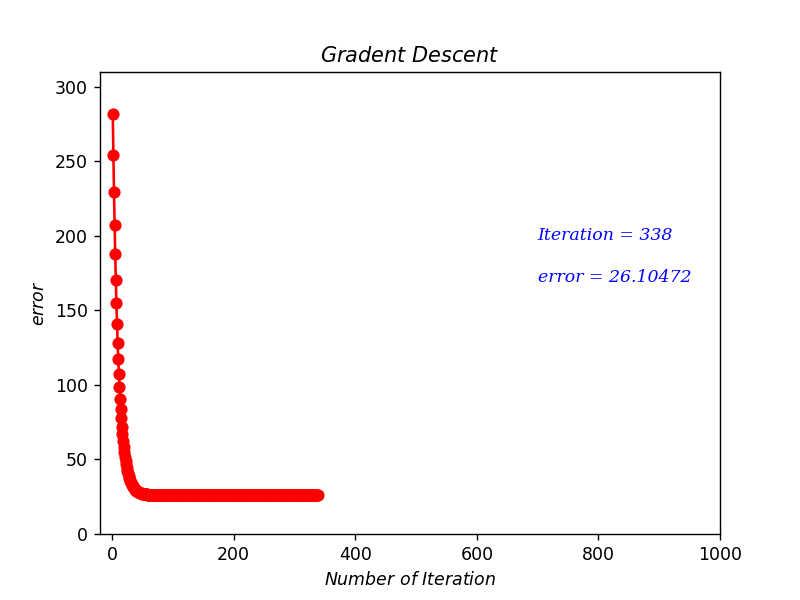

In [23]:
#import matplotlib.animation as animation

%matplotlib notebook
experiment_times = np.arange(1, num_iter + 1)

text_font = {'family': 'serif', 'style': 'italic', 'color': 'blue', 'weight': 'normal', 'size': 10}

fig, ax = plt.subplots()
scat, = ax.plot([], [], marker = 'o', color = 'r')
iter_text = ax.text(x = experiment_times[-1]*0.7, y = np.max(err)*0.7, s = '', fontdict = text_font)
err_text = ax.text(x = experiment_times[-1]*0.7, y = np.max(err)*0.6, s = '', fontdict = text_font)
ax.set_xlim(-20, num_iter)
ax.set_ylim(0, np.max(err) + np.max(err)*0.1)
ax.set_ylabel(ylabel = '$error$')
ax.set_xlabel(xlabel = '$Number\ of\ Iteration$')
ax.set_title(label = '$Gradent\ Descent$')
x, y = [], []


def init():
    scat.set_data([], [])
    iter_text.set_text("")
    err_text.set_text("")
    return scat, iter_text, err_text

def ani(i):
    
    global x, y
    
    x.append(experiment_times[i])
    y.append(err[i])
    
    scat.set_xdata(x)
    scat.set_ydata(y)
    iter_text.set_text(s = ("Iteration = %s" % (experiment_times[i])))
    err_text.set_text(s = ("error = %.5f" % (err[i])))
    
    if len(x) == num_iter:
        del x[:], y[:]
    
    return scat, iter_text, err_text

ani = animation.FuncAnimation(fig = fig, func = ani, frames = num_iter, init_func = init, interval = 10, blit = True)
plt.show()

<IPython.core.display.Javascript object>


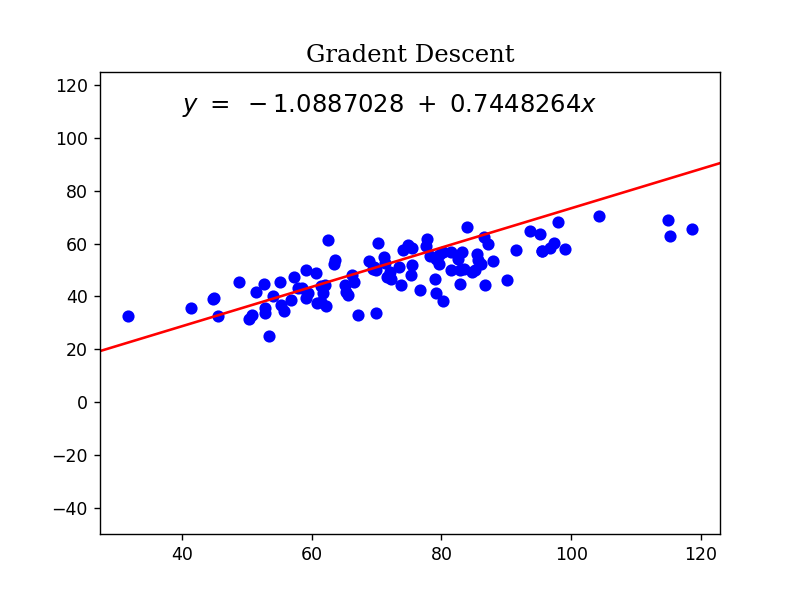

In [24]:
import matplotlib.animation as animation

%matplotlib notebook

df = np.genfromtxt(fname = "C:\\Users\\Bing\\Desktop\\GradientDescentExample-master\\data.csv", delimiter = ',')
y, x = df[:, 0], df[:, 1]

fig, ax = plt.subplots()

plot_x = np.arange(1, num_iter + 1 )

trans_y = [bias[num] + slope[num]*plot_x for num in range(num_iter)]

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 14}

line, = ax.plot([], [], c = 'r')
fun_text = ax.text(x = 40, y = 110, s = (r'$y\ =\ %.2f\ +\ %.2fx$' % (bias[0], slope[0])), fontdict = font)
ax.set_ylim(bottom = -50, top = 125)
ax.set_title(label = 'Gradent Descent', fontdict = font)
ax.scatter(x, y, color = 'b')

def animate(i):
    fun_text.set_text(r'$y\ =\ %.7f\ +\ %.7fx$' % (bias[i], slope[i]))
    line.set_ydata(trans_y[i])
    line.set_xdata(plot_x)
    return fun_text, line

def init():
    fun_text.set_text("")
    line.set_data([], [])
    return fun_text, line

ani = animation.FuncAnimation(fig = fig, func = animate, init_func = init, frames = num_iter,
                              interval = 100, blit = True)
#ani.save('C:\\Users\\Bing\\Desktop\\gradient descent.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

<IPython.core.display.Javascript object>


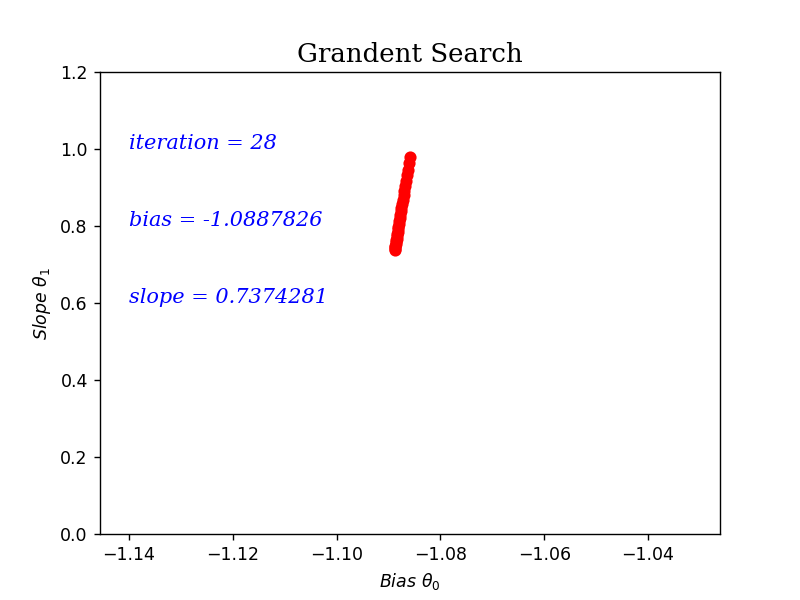

In [16]:
%matplotlib notebook

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin'

title_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 15}
text_font = {'family': 'serif', 'style': 'italic', 'color': 'blue', 'weight': 'normal', 'size': 12}

fig, ax = plt.subplots(nrows=1, ncols=1)
scat, = ax.plot(bias[0], slope[0], linestyle = '', marker = 'o', color = 'r')
slope_text = ax.text(x = -1.14, y = 0.6, s = '', fontdict = text_font)
bias_text = ax.text(x = -1.14, y = 0.8, s = '', fontdict = text_font)
iter_text = ax.text(x = -1.14, y = 1, s = '', fontdict = text_font)
ax.set_ylabel(r'$Slope\ \theta_1$')
ax.set_xlabel(r"$Bias\ \theta_0$")
ax.set_title("Grandent Search", fontdict = title_font)
ax.set_ylim(0, 1.2)
x, y = [], []

def init():
    scat.set_data([], [])
    bias_text.set_text('')
    slope_text.set_text('')
    iter_text.set_text('')
    return scat, iter_text, bias_text, slope_text

def animate(i):
    
    global x, y
    
    x.append(bias[i])
    y.append(slope[i])
    
    scat.set_xdata(x)
    scat.set_ydata(y)
    iter_text.set_text('iteration = %d' % i)
    bias_text.set_text('bias = %.7f' % bias[i])
    slope_text.set_text('slope = %.7f' % slope[i])
    
    if len(x) == num_iter:
        del x[:], y[:]

    return scat, iter_text, bias_text, slope_text


ani = animation.FuncAnimation(fig = fig, func = animate, frames = num_iter, init_func = init, interval = 50, repeat = True)
plt.show()

#FFwriter = animation.FFMpegFileWriter()
#ani.save(filename = 'gradient_search.mp4', writer = 'ffmpge', fps = 30)

In [9]:
% save C:\\Users\\Bing\\Desktop\\gradient.py 1-20

The following commands were written to file `C:\\Users\\Bing\\Desktop\\gradient.py`:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gradient descent implemetation 

class gradient_descent():
    def __init__(self, num_iteration, learning_rate):
        self.numIteration = num_iteration # setting number of iteration
        self.learningRate = learning_rate # setting learning rate
        
    def compute_error(self, y, x, theta):
        error = np.sum((y - np.dot(theta, x.transpose()))**2)/(2*len(y)) # Cost function
        return(error)
    
    def add_bias_feature(self, x):
        adding = np.ones(x.shape[0])
        new_x = np.column_stack(tup = (adding, x)) 
        return(new_x)
        
    def calculate_gradient(self, y, x, rand_seed): # hypothesis => y = b + wx
        
        x = self.add_bias_feature(x)
        xTrans = x.transpose()
        
        np.random.seed(seed = rand_seed)
        theta = np.random.normal(loc = 0, scale = 1, size = x.sh